# 実習09-2 画像分類2 ImageDataGenerator

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


kerasでCNNを使用して、猫と犬の画像を分類するプログラムを作成する。今回は、ImageDataGeneratorを使用して、画像データの格納されたフォルダの情報から、学習と検証に使用するデータを作成する部分を中心に取り扱う。

一部参考：[画像分類（Tensorflow Core）](https://www.tensorflow.org/tutorials/images/classification?hl=ja)


**学習に時間がかかるので、可能であればランタイムのタイプをGPUにする。**<br>
(ランタイム＞ランタイムのタイプを変更)

**GPUへは同時に1つしか接続できません。実習09-1から続けて実施する場合などは、「セッションの管理」から他のセッションを終了してください。**


import文は最初にまとめておいてもいいです。

In [2]:
# import 文をまとめる場合はここに
import tensorflow as tf # 後で使う
from tensorflow import keras


## 1. データセットの準備
### 1-1. zipファイルのダウンロードと展開
まずは学習用とテスト用のデータセットを準備する。 Kaggle の Dogs vs Cats データセットをフィルタリングしたバージョンをインターネットからダウンロードして使用する。

```

# ダウンロード元URL
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# get_fileを使用してzipをダウンロードし展開（import tensorflow as tf必要）
# ダウンロード先（cache_subdir）は必要に応じて変更する
path_to_zip = keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True, cache_subdir='/content/datasets')

```


In [3]:
# ダウンロード元URL
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# get_fileを使用してzipをダウンロードし展開（import tensorflow as tf必要）
# ダウンロード先（cache_subdir）は必要に応じて変更する
path_to_zip = keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True, cache_subdir='/content/datasets')

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


ファイルがダウンロードされ、展開されていることを確認すること。
また、展開後のディレクトリ構成を確認すること。

```
.
| - datasets
     | - cats_and_dogs_filtered
           | - train
                | - cats (画像フォルダ)
                | - dogs（画像フォルダ）
           | - validation
                | - cats (画像フォルダ)
                | - dogs（画像フォルダ）

```
またzipファイルを自分のPCにもダウンロードしておくこと。

### 1-2. データの前処理
データをモデルに入力するための前処理として、「画像の読み取り」「数値への変換」「値の範囲変更（0～255 → 0～1）」を行う。
これは、ImageDataGeneratorで実行できる。

まずはジェネレータをセットアップする。
（tensorflow.keras.preprocessing.image.ImageDataGeneratorを使用する。）
```

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_img_gen = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ
# 検証データのジェネレータは自分で作成
val_img_gen = ...
```

In [4]:
# ジェネレータのセットアップ（訓練用、テスト用それぞれ）
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_img_gen = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ

# 検証データのジェネレータは自分で作成
val_img_gen = ImageDataGenerator(rescale=1./255)

次に、ジェネレータのflow_from_directoryを使用し、画像のあるディレクトリ等を指定する。すると、データセットを自動的に作成する。<br>
**seedには学籍番号を指定すること**

```
# 訓練用データ作成（検証用データは自分で）
train_data_it = train_img_gen.flow_from_directory(directory='学習用データのあるディレクトリ',
                                                           shuffle=True, #シャッフルするか
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH), #出力画像サイズ
                                                           class_mode='binary',  # ラベル（出力）の種類
                                                           seed=学籍番号
                      )
```


In [5]:
# 縦横のサイズを変数に入れておく（実行すること）
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [6]:
# 訓練用データ作成
train_data_it = train_img_gen.flow_from_directory(directory='/content/datasets/cats_and_dogs_filtered/train',
                                                           shuffle=True, #シャッフルするか
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH), #出力画像サイズ
                                                           class_mode='binary',  # ラベル（出力）の種類
                                                           seed=2220042
)
val_data_it = val_img_gen.flow_from_directory(directory='/content/datasets/cats_and_dogs_filtered/validation',
                                                           shuffle=True, #シャッフルするか
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH), #出力画像サイズ
                                                           class_mode='binary',  # ラベル（出力）の種類
                                                           seed=2220042
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
# 検証用の方は自分で書いてみる
# train_data_it[0]
val_data_it[0]

(array([[[[0.03529412, 0.03529412, 0.02745098],
          [0.03529412, 0.03529412, 0.02745098],
          [0.03529412, 0.03529412, 0.02745098],
          ...,
          [0.04313726, 0.04313726, 0.03529412],
          [0.04313726, 0.04313726, 0.03529412],
          [0.0509804 , 0.0509804 , 0.04313726]],
 
         [[0.03529412, 0.03529412, 0.02745098],
          [0.03529412, 0.03529412, 0.02745098],
          [0.03529412, 0.03529412, 0.02745098],
          ...,
          [0.04313726, 0.04313726, 0.03529412],
          [0.04313726, 0.04313726, 0.03529412],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.03529412, 0.03529412, 0.02745098],
          [0.03529412, 0.03529412, 0.02745098],
          [0.03529412, 0.03529412, 0.02745098],
          ...,
          [0.04313726, 0.04313726, 0.03529412],
          [0.04313726, 0.04313726, 0.03529412],
          [0.03529412, 0.03529412, 0.02745098]],
 
         ...,
 
         [[0.1254902 , 0.12156864, 0.10588236],
          [0.12156

## 2. モデルの作成と保存
### 2-1. モデルの構成と確認
今回は、入力画像に畳み込みとプーリングを1回ずつ行い、1次元にして全結合層を通して出力する。

モデルを作成しsummaryを確認する。

```
# 今回はとりあえずモデルを作成する
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = keras.Sequential([
    Input(shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    Conv2D(16, 3, padding='same', activation='relu'), #16個の3x3フィルタ、サイズが同じになるpadding、活性化関数
    MaxPooling2D(4,4), #4x4の最大プーリング
    Flatten(), #1次元にする
    Dense(32, activation='relu'),
    Dense(ノード数, activation='関数') #2値分類の場合、ノード数と活性化関数はどうしますか
])

```

In [8]:
# モデル作成
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = keras.Sequential([
    Input(shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    Conv2D(16, 3, padding='same', activation='relu'), #16個の3x3フィルタ、サイズが同じになるpadding、活性化関数
    MaxPooling2D(4,4), #4x4の最大プーリング
    Flatten(), #1次元にする
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') #2値分類の場合、ノード数と活性化関数はどうしますか
])

In [9]:
# .summary()で確認
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 56, 56, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       1,605,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,606,145 (6.13 MB)

 Trainable params: 1,606,145 (6.13 MB)

 Non-trainable params: 0 (0.00 B)

### 2-2. モデルのコンパイル
compile（）でモデルをコンパイルする。
今回は2値分類なので、損失関数をbinary_crossentropy、オプティマイザをadam、メトリクスはaccuracyを使用することにする。

```
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
```

In [10]:
# コンパイル
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 2-3. モデルの学習と評価
学習にはfitを用いる。この時、入力xと出力yの代わりにジェネレータで生成したもの（train_data_genなど）を入力することができる。バッチサイズやエポック数なども指定できる。

さらに、validation_dataで検証用のImageDataGeneratorを指定することで、各エポックごとに検証用データに対する精度も計算できる。後でグラフ化するために変数に入れておこう。

```
# epochsは20ぐらいが分かりやすいかも
hist = model.fit(train_data_it, validation_data=検証用のイテレータ, epochs=数)

```


In [11]:
# fitで学習
hist = model.fit(train_data_it, validation_data=val_data_it, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.5349 - loss: 1.0552 - val_accuracy: 0.6430 - val_loss: 0.6252
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.7087 - loss: 0.5662 - val_accuracy: 0.6910 - val_loss: 0.5811
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.7909 - loss: 0.4521 - val_accuracy: 0.7000 - val_loss: 0.5772
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.8536 - loss: 0.3606 - val_accuracy: 0.6920 - val_loss: 0.5934
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9241 - loss: 0.2611 - val_accuracy: 0.7090 - val_loss: 0.6339
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9383 - loss: 0.1944 - val_accuracy: 0.6870 - val_loss: 0.6905
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9700 - loss: 0.1429 - val_accuracy: 0.7030 - val_loss: 0.6917
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.9829 - loss: 0.0928 - val_accuracy: 0.6980 - val_lo

学習の過程と結果をグラフ化する。（前回と同じ）

In [12]:
# このまま実行する
import matplotlib.pyplot as plt

# 後のために、グラフを表示する関数を作成しておく
def plot_graphs(hist, metric):

  # ----------------------------
  # 各epochでの誤差と精度を取得
  # ----------------------------
  met      = hist.history[     metric ]
  val_met  = hist.history[ 'val_'+metric ]
  loss     = hist.history[    'loss' ]
  val_loss = hist.history['val_loss' ]

  epochs   = range(len(met)) # Get number of epochs

  # ---------------------------------------------
  # エポック数に対する誤差を表示（片対数グラフ）
  # --------------------------------------------
  plt.plot  ( epochs,     loss, label='loss')
  plt.plot  ( epochs, val_loss, label='val_loss')
  plt.title ('Training and validation loss'   )
  plt.legend()
  plt.yscale('log')
  plt.figure()
  plt.show()

  # ------------------------------------------------
  # エポック数に対するメトリックの値を表示
  # ------------------------------------------------
  plt.plot  ( epochs,     met, label='met' )
  plt.plot  ( epochs, val_met, label='val_met')
  plt.title ('Training and validation metric value')
  plt.legend()
  plt.figure()
  plt.show()

損失関数の値（loss）と正解率（accuracy）をグラフ化して学習結果を視覚的に確認する。
```
# lossはデフォルトで表示するので、accuracyを指定
plot_graphs(hist, 'accuracy')
```

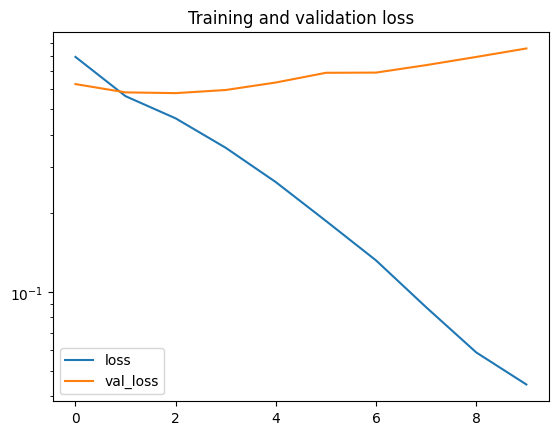

<Figure size 640x480 with 0 Axes>

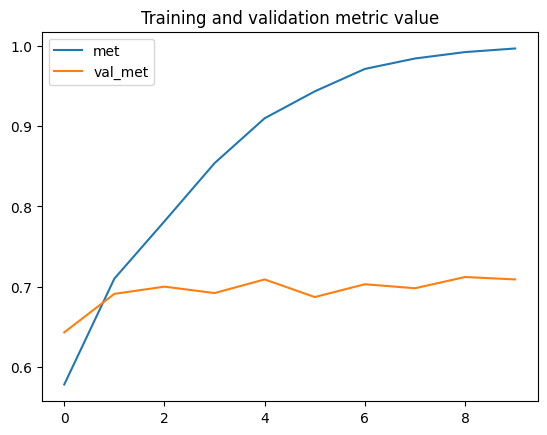

<Figure size 640x480 with 0 Axes>

In [20]:
# グラフの描画
plot_graphs(hist, 'accuracy')

**[課題]訓練用データに対する結果と検証用データの結果を見て分かることを書いてください。**

*   訓練データと検証データの正解率
*   精度に大きな差がある場合は、過学習の可能性があるかも

**可能であれば、モデルのフィルタ数や層を変更したり、epoch数を変えたりして、検証用データに対する精度を上げてみよう。**

### 予測結果の出力
予測結果の出力は数値で表示される。
今回は2値分類であり、犬と猫のどちらが0でどちらが1である。
これを、catsまたはdogsと表示させた方が親切なので、その変換方法を考える。


猫と犬の写真を1枚ずつアップロードし、predictを使用して出力を確認しておく。

```
# 読み込みと確認
img = keras.preprocessing.image.load_img(
    'アップロードしたファイル名', target_size=(IMG_HEIGHT, IMG_WIDTH)
)
img
```

```
#画像を配列に変換
img_array = keras.preprocessing.image.img_to_array(img)
#軸の追加（1枚の画像のため）
img_array = img_array[tf.newaxis, ...]
#スケーリング（0～255 → 0～1）
img_array = img_array/255.0
```

```
#予測
model.predict(img_array)
```

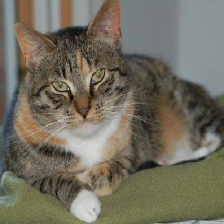

In [21]:
#猫の画像
#読み込みと確認
img = keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/第09週_画像分類1CNN・2ImageDataGenerator/cat01.jpg', target_size=(IMG_HEIGHT, IMG_WIDTH)
)
img

In [22]:
# 画像を配列に変換
img_array = keras.preprocessing.image.img_to_array(img)
# 軸の追加（1枚の画像のため）
img_array = img_array[tf.newaxis, ...]
# スケーリング（0～255 → 0～1）
img_array = img_array/255.0

In [24]:
# 予測
model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.06600755]], dtype=float32)

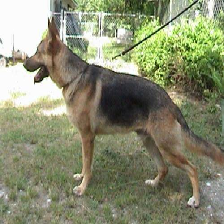

In [27]:
# 犬の画像は自分でやってみる
img = keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/第09週_画像分類1CNN・2ImageDataGenerator/dog01.jpg', target_size=(IMG_HEIGHT, IMG_WIDTH)
)
img

In [28]:
# 画像を配列に変換
img_array = keras.preprocessing.image.img_to_array(img)
# 軸の追加（1枚の画像のため）
img_array = img_array[tf.newaxis, ...]
# スケーリング（0～255 → 0～1）
img_array = img_array/255.0

In [29]:
# 予測
model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0.9994981]], dtype=float32)

猫と犬のどちらが0で1かは、ジェネレータの以下の要素で確認できる。
```
train_data_it.class_indices
```


In [30]:
# 0と1の確認
train_data_it.class_indices

{'cats': 0, 'dogs': 1}

predictで出力される数値を、犬か猫かで出力するため、次の手順をとる。

*   出力がリストのリストなので、浮動小数点数にする
（結果の[0][0]番目の要素を指定）
*   四捨五入しintに変換することで0か1にする。
（.round().astype(int)）
*   0ならcats、1ならdogsと出力する。（リスト使用）
（リストはlist(train_data_it.class_indices.keys())）

In [31]:
# 手順例（この通りでなくても可）
# 予測結果を一旦変数に入れる
pred = model.predict(img_array)
# 四捨五入しint型に変換
pred = model.predict(img_array).round().astype(int)

# 変換リストの作成
list(train_data_it.class_indices.keys())

# リスト名[0か1]
list(train_data_it.class_indices.keys())[pred[0][0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'dogs'

# 提出について

実習が終わったら、以下を教員にチェックしてもらうこと。

*   学習結果のグラフからわかること
*   犬画像の予測結果

チェック後、このファイルをipynbでダウンロードして提出してください。（ダウンロード前に、クラス番号氏名を変更すること。）
